In [1]:
import sys
sys.path.append('..')

In [2]:
import os
import json
import polars as pl

import evaluation as ev

pl.config.Config.set_tbl_rows(100)

polars.config.Config

In [3]:
batch_path = os.path.abspath('/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/results/batch_20241119_121641/')

# Explore Results

In [4]:
results_path = os.path.join(batch_path, 'results.json')

with open(results_path, 'r') as f:
    results = json.load(f)

data = []
for file_path, result in results.items():
    true_label = ev.get_true_label(file_path)
    pred_label = result["prediction"]
    data.append({"true_label": true_label, "pred_label": pred_label})

df = pl.DataFrame(data)
df['pred_label'].value_counts()

pred_label,count
str,u32
"""HOME MANAGEMENT""",330
"""LEISURE""",317
"""FUNCTIONAL MOBILITY""",127
"""COMMUNICATION MANAGEMENT""",408
"""MEAL PREPARATION AND CLEANUP""",739
"""GROOMING AND HEALTH MANAGEMENT""",116
"""FEEDING""",224


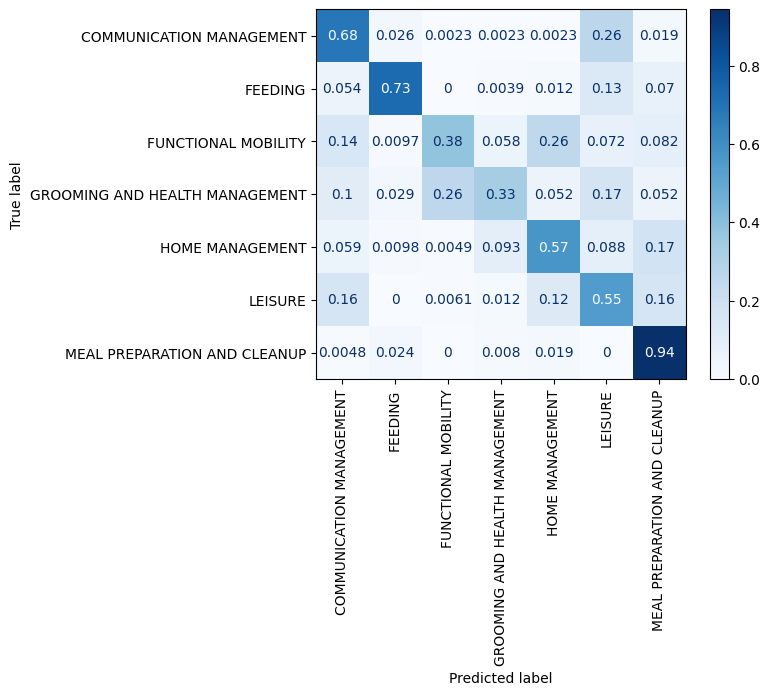

In [5]:
evaluation = ev.evaluate_adl_classifications(results_dict=results)

In [6]:
evaluation['additional_metrics']

{'Balanced Accuracy': np.float64(0.5971274224165041),
 'Macro Avg F1': 0.5869391419165024,
 'Weighted Avg F1': 0.5869391419165021}

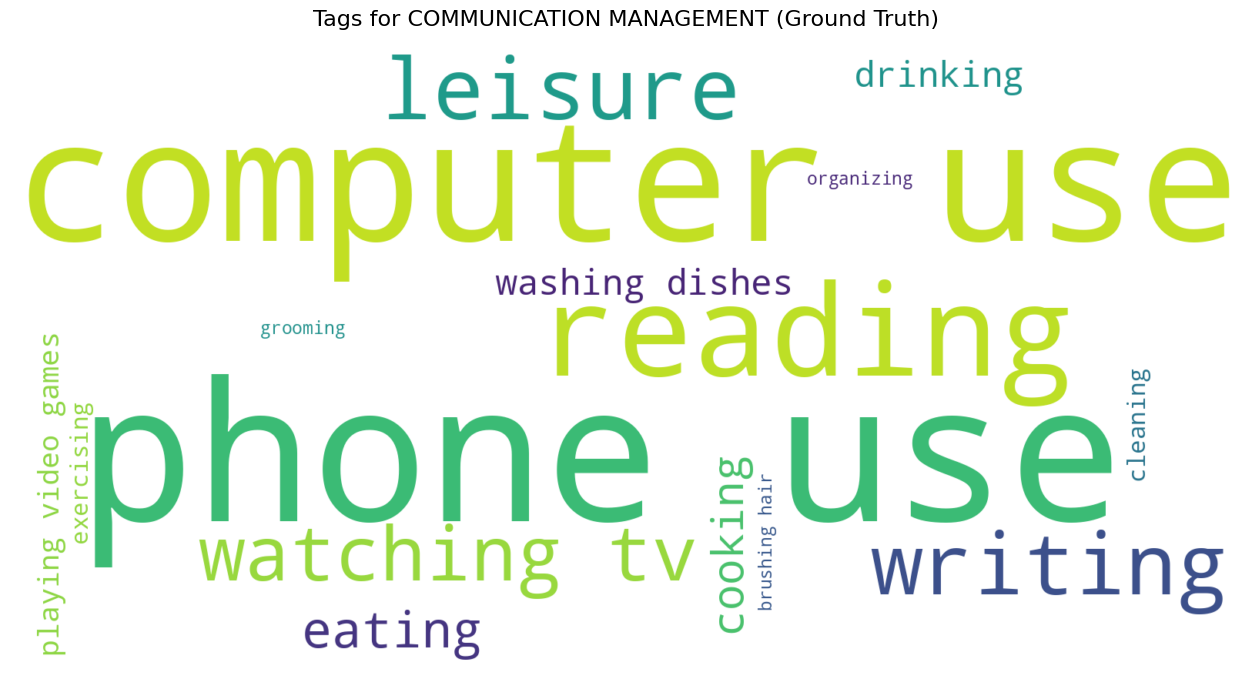

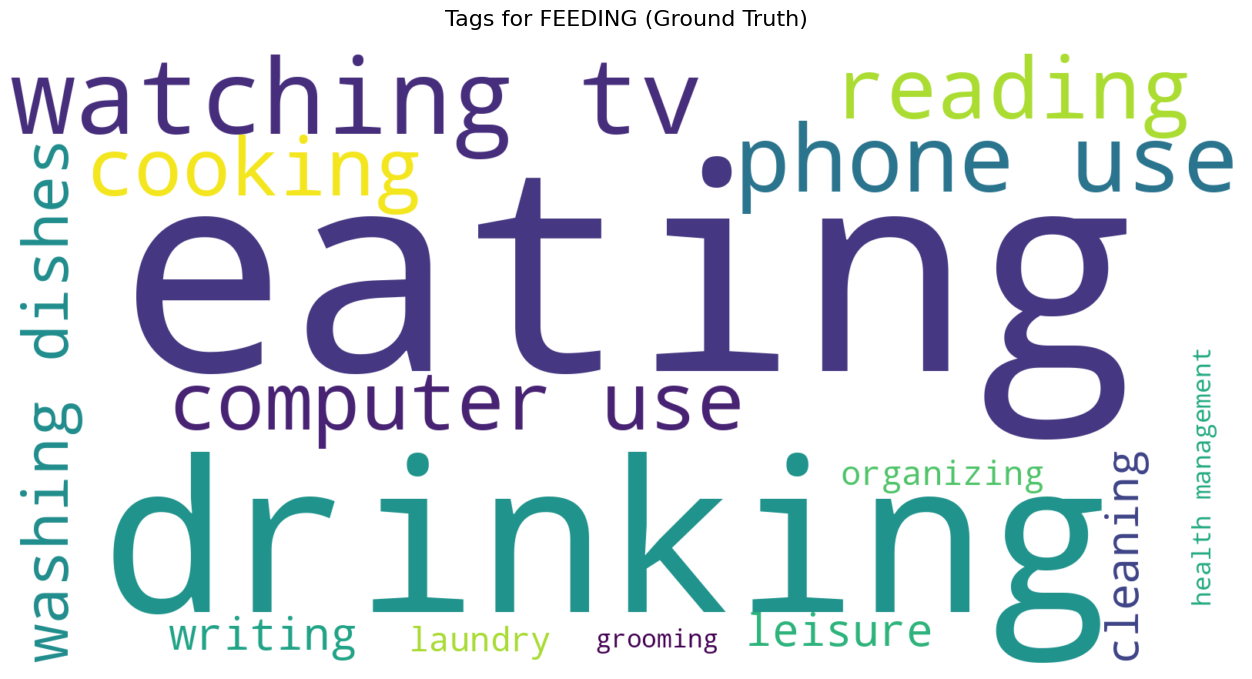

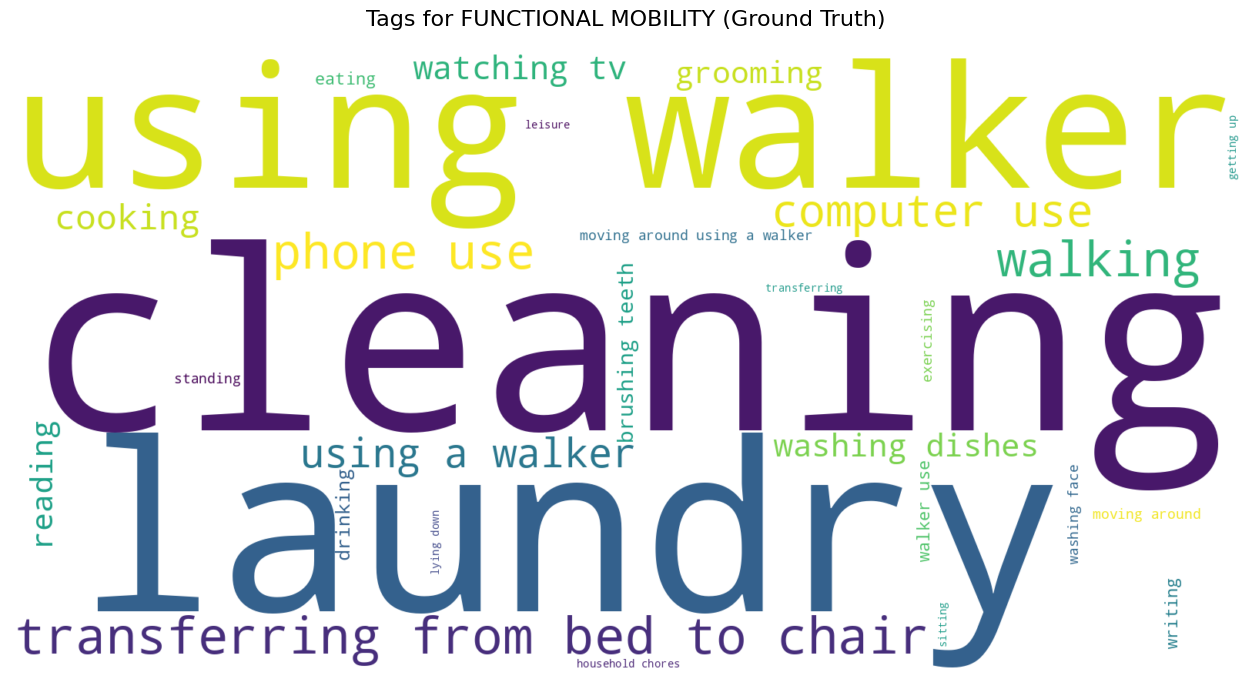

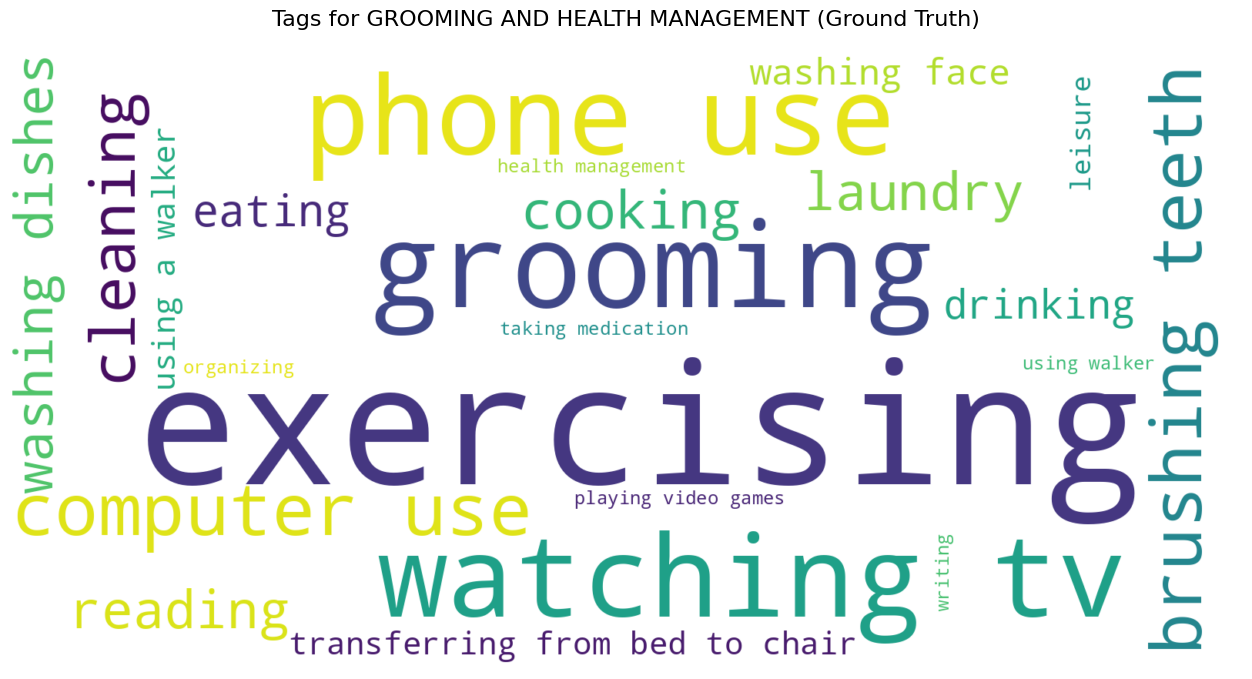

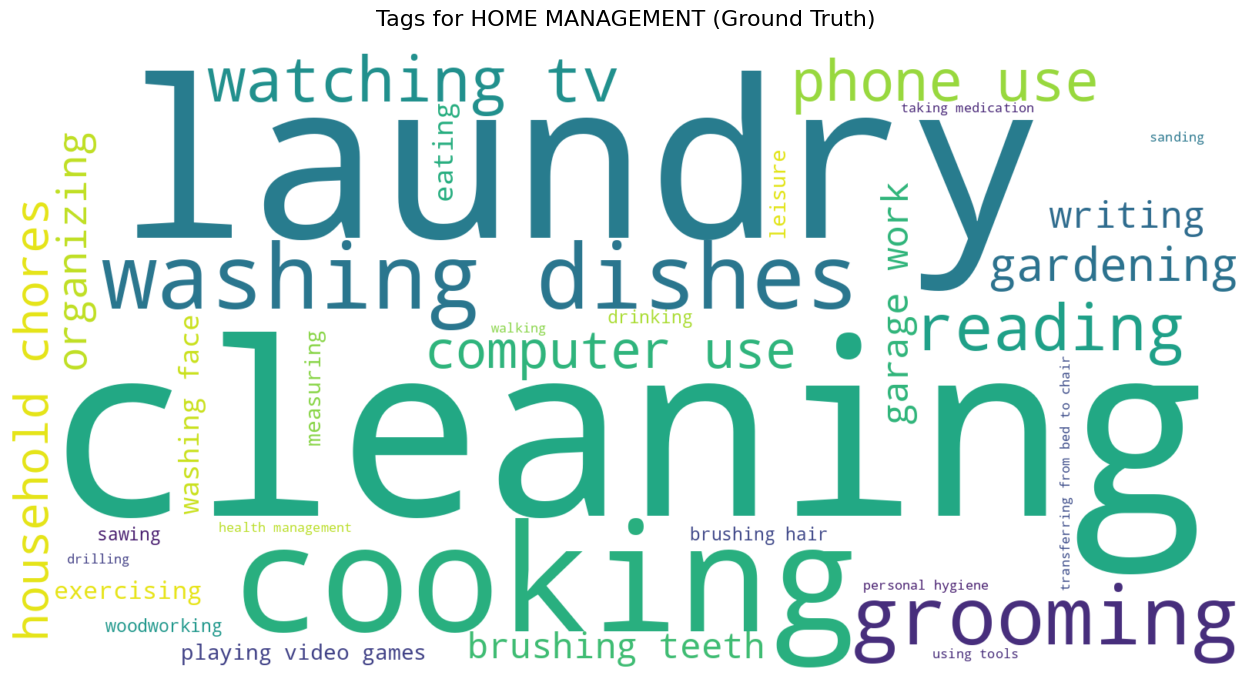

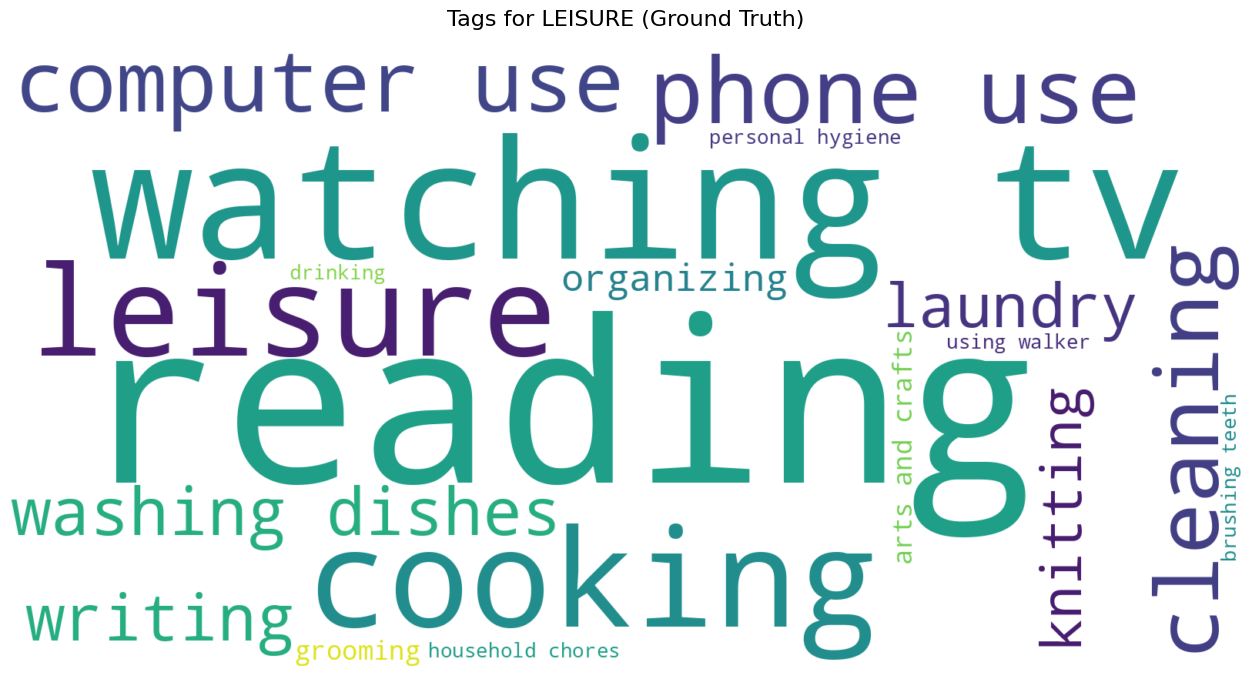

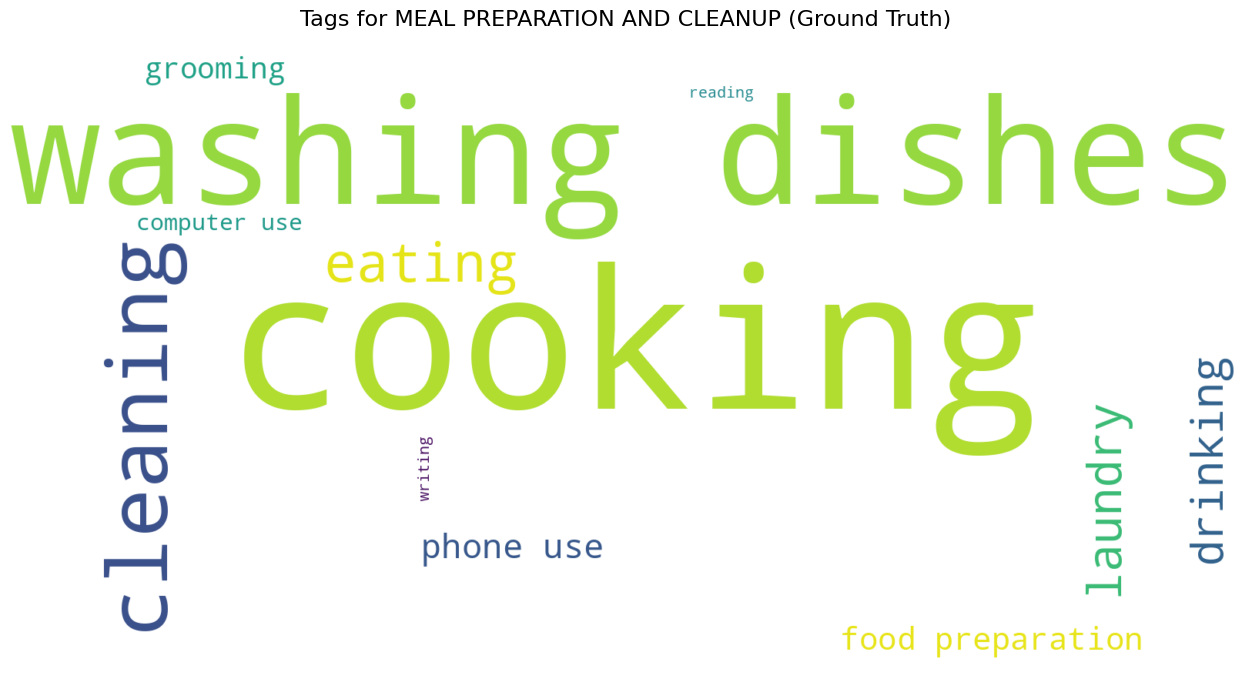

In [7]:
analysis_results_gt = ev.analyze_tags(results)

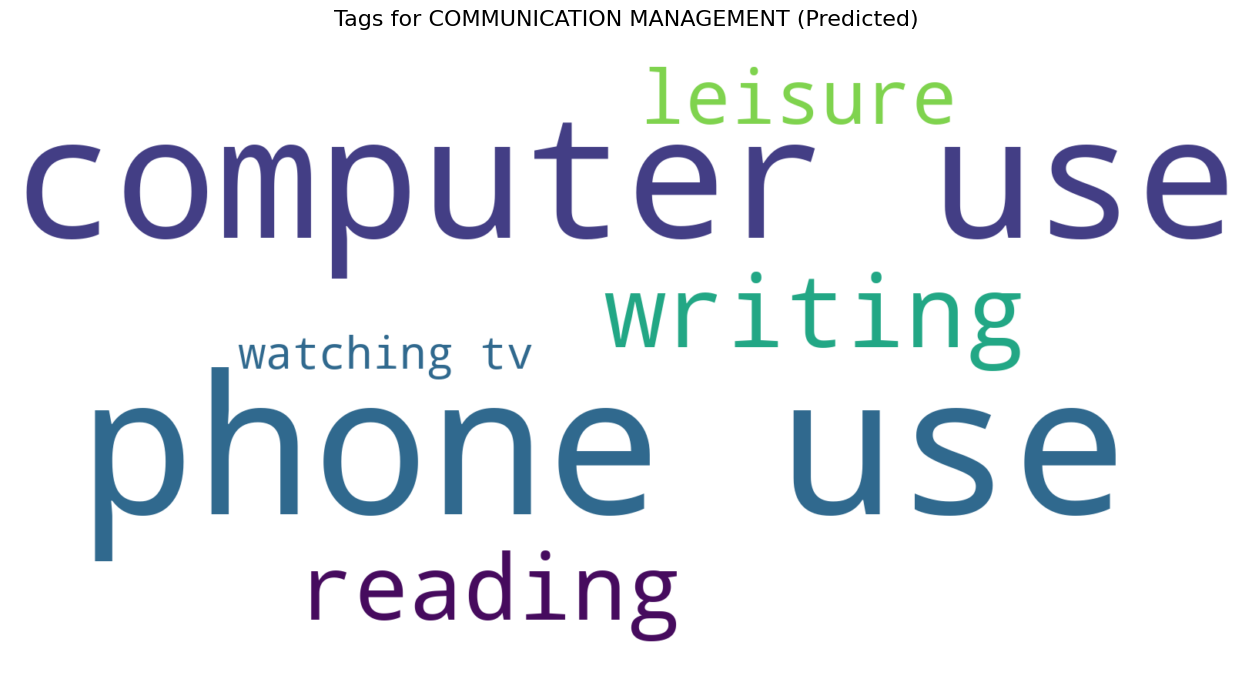

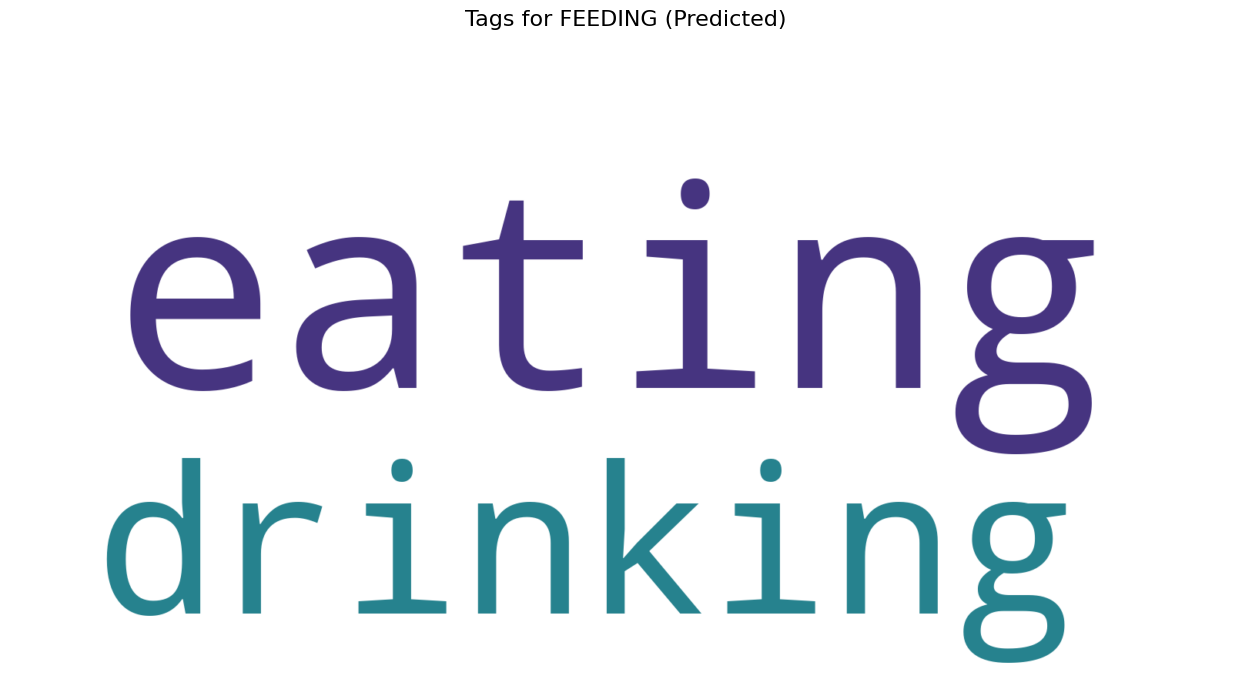

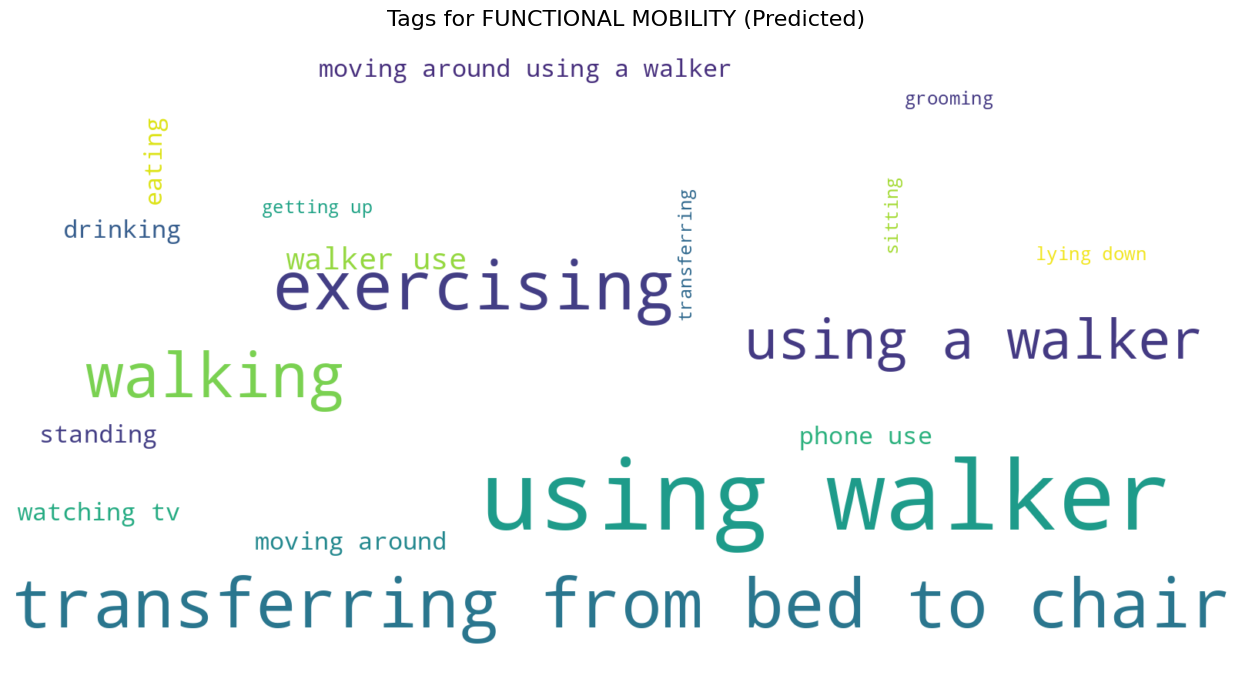

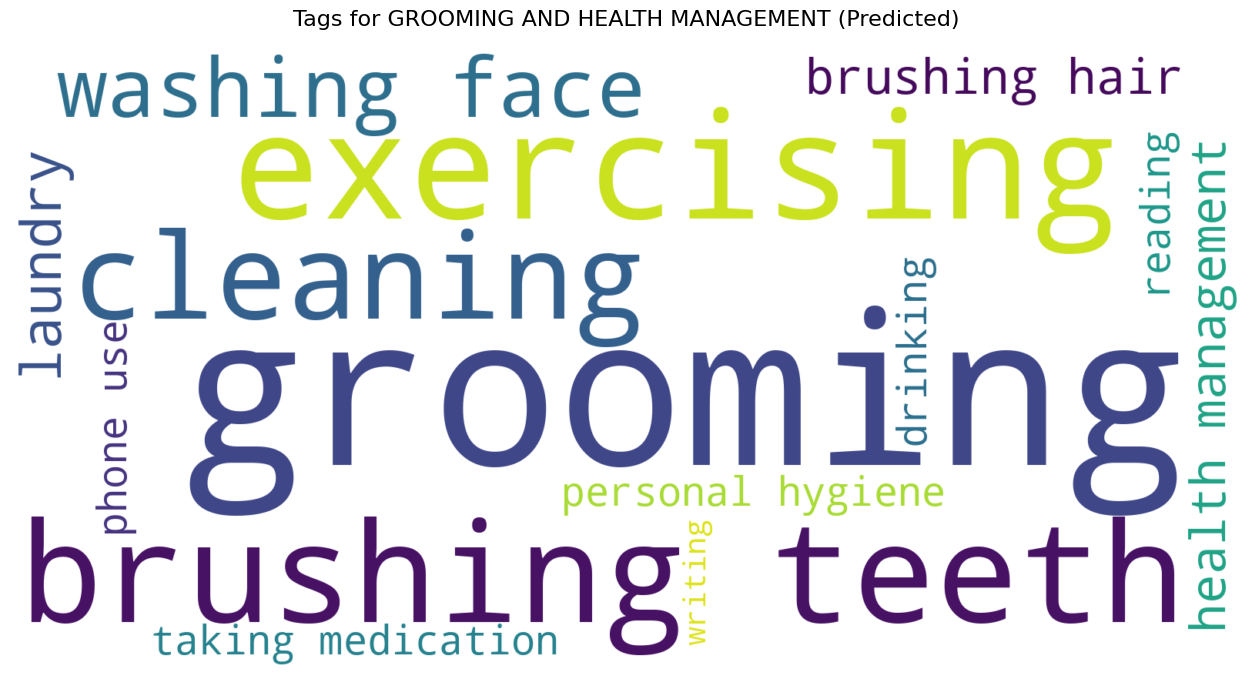

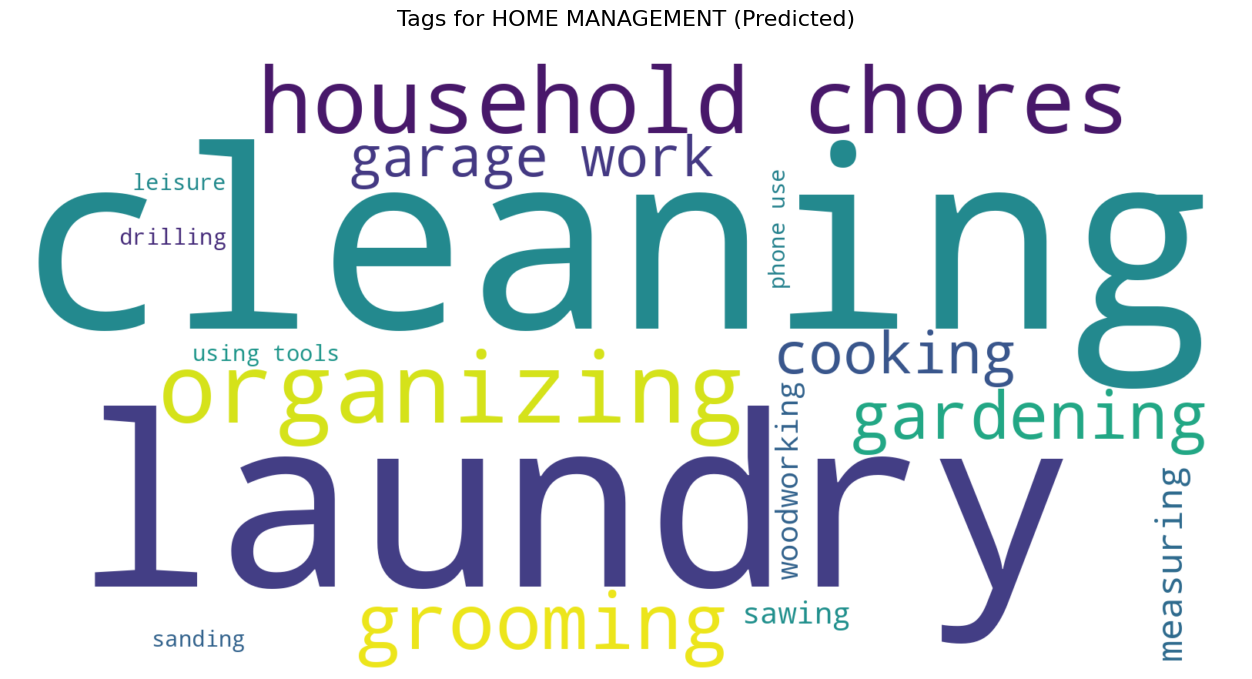

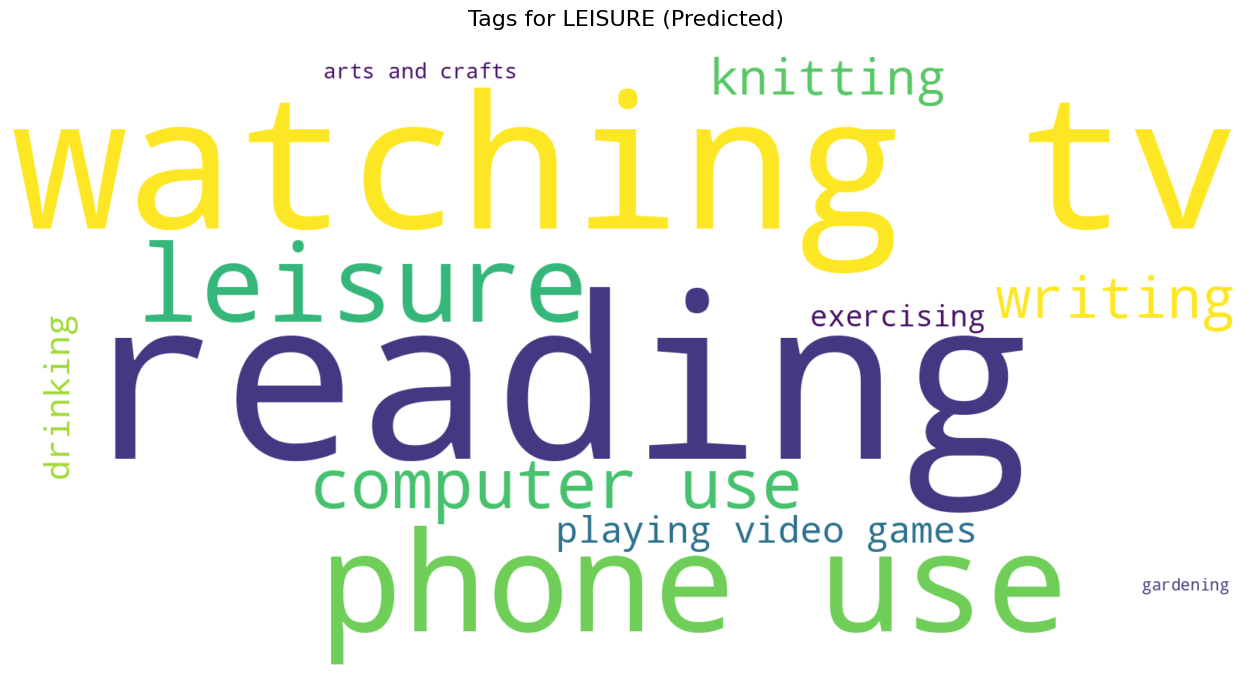

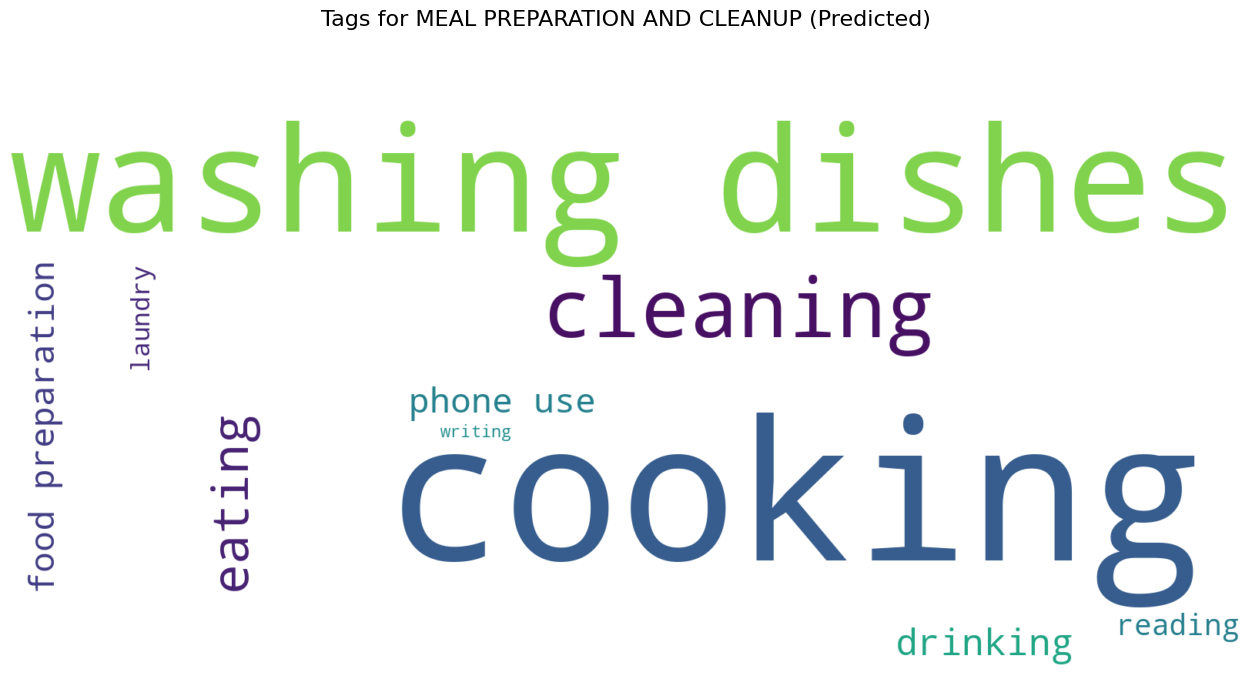

In [8]:
analysis_results_pred = ev.analyze_tags(results,use_ground_truth=False)

In [9]:
summary = ev.analyze_predictions(results)

In [10]:
# Print summary
print("\nPrediction Analysis Summary:")
for label, stats in summary.items():
    print(f"\n{label}:")
    print(f"Total samples: {stats['total_samples']}")
    print(f"Accuracy: {stats['accuracy']}%")
    if stats['misclassifications']:
        print("Misclassified as:")
        for wrong_label, count in stats['misclassifications'].items():
            print(f"  {wrong_label}: {count} times")


Prediction Analysis Summary:

COMMUNICATION MANAGEMENT:
Total samples: 428
Accuracy: 68.46%
Misclassified as:
  LEISURE: 113 times
  FEEDING: 11 times
  MEAL PREPARATION AND CLEANUP: 8 times
  HOME MANAGEMENT: 1 times
  FUNCTIONAL MOBILITY: 1 times
  GROOMING AND HEALTH MANAGEMENT: 1 times

FUNCTIONAL MOBILITY:
Total samples: 207
Accuracy: 37.68%
Misclassified as:
  HOME MANAGEMENT: 53 times
  COMMUNICATION MANAGEMENT: 30 times
  MEAL PREPARATION AND CLEANUP: 17 times
  LEISURE: 15 times
  GROOMING AND HEALTH MANAGEMENT: 12 times
  FEEDING: 2 times

GROOMING AND HEALTH MANAGEMENT:
Total samples: 172
Accuracy: 33.14%
Misclassified as:
  FUNCTIONAL MOBILITY: 45 times
  LEISURE: 29 times
  COMMUNICATION MANAGEMENT: 18 times
  MEAL PREPARATION AND CLEANUP: 9 times
  HOME MANAGEMENT: 9 times
  FEEDING: 5 times

HOME MANAGEMENT:
Total samples: 407
Accuracy: 57.0%
Misclassified as:
  MEAL PREPARATION AND CLEANUP: 71 times
  GROOMING AND HEALTH MANAGEMENT: 38 times
  LEISURE: 36 times
  COMMU

In [11]:
results = ev.calculate_alignment_rate(os.path.join(batch_path, 'alignment.json'))

# Print results
print(f"Alignment Rate: {results['alignment_rate']:.1f}%")
print(f"Mean Score: {results['mean_score']:.2f}")
print(f"Median Score: {results['median_score']:.1f}")
print("\nScore Distribution:")
for score, count in results['score_distribution'].items():
    print(f"Score {score}: {count} samples")
print(f"\nTotal Samples: {results['n_samples']}")

Alignment Rate: 79.4%
Mean Score: 4.08
Median Score: 5.0

Score Distribution:
Score 1: 27 samples
Score 2: 6 samples
Score 3: 3 samples
Score 4: 29 samples
Score 5: 110 samples

Total Samples: 175
